In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Dropout, Flatten
from keras import callbacks, optimizers

import os
import glob
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

%matplotlib inline

Using TensorFlow backend.


In [2]:
# our parameters
train_data_pth = os.getcwd() + '/../data_raw/train/'
validation_data_pth = os.getcwd() + '/../data_raw/validation/'
log_pth = os.getcwd() + '/../data/logs/'
n_train_samples = 1800
n_validation_samples = 100
n_epochs = 10
batch_size = 20
n_classes = 4
img_width, img_height = 80, 80
input_shape = (img_width, img_height, 3)

In [9]:
folders = ['bart', 'hommer', 'lisa', 'marge']
y = []
y_hat = []

for i in range(len(folders)):
    files = glob.glob('/home/matt/Repos/simpsons/data_raw/color/validation/' + folders[i] + '/*.jpg')
    for f in files:
        img = Image.open(f)
        img = img.resize((img_width, img_height), Image.ANTIALIAS)
        y.append(i)
        y_hat.append(model.predict_classes(np.expand_dims(np.asarray(img), axis=0))[0])

1/1 [==============================] - 0s


1/1 [==============================] - 0s


In [10]:
sum(1 for i, j in zip(y_hat, y) if i == j) / float(len(y_hat))

0.8820960698689956

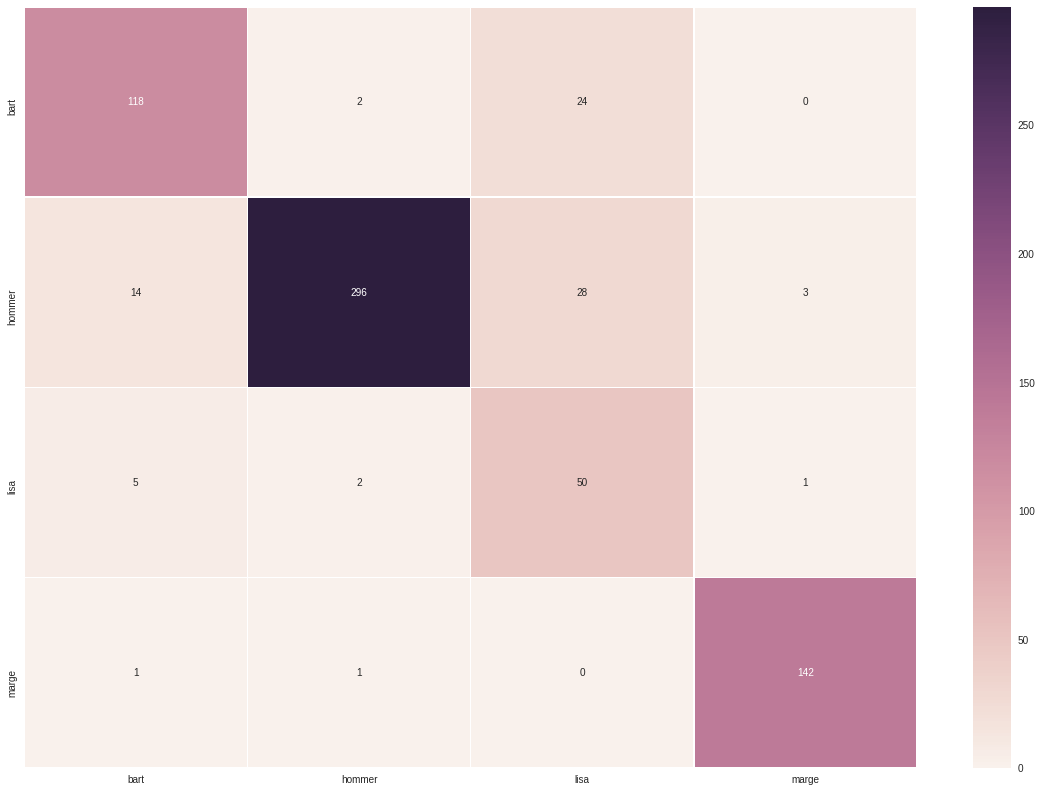

In [11]:
conf_matrix = [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
for i in range(len(y)):
    conf_matrix[y[i]][y_hat[i]] += 1

df_cm = pd.DataFrame(conf_matrix, index = ['bart', 'hommer', 'lisa', 'marge'],
                  columns = ['bart', 'hommer', 'lisa', 'marge'])

plt.figure(figsize = (20, 14))
sn.heatmap(df_cm, annot=True, linewidths=0.5, fmt='g')